In [109]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [110]:
df= pd.read_csv('soneta.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [111]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [112]:
df.groupby(['Gender'])['Purchased'].sum()

Gender
Female    77
Male      66
Name: Purchased, dtype: int64

In [113]:
df.groupby(['Gender'])['EstimatedSalary'].mean()

Gender
Female    71759.803922
Male      67642.857143
Name: EstimatedSalary, dtype: float64

In [114]:
crosstab = pd.crosstab(df['Gender'], df['Purchased'])

In [115]:
crosstab

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [116]:
cdf= df.drop(['User ID'], axis=1)

In [117]:
cdf

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [118]:
cdf['Gender'].replace(['Male','Female'],[1,0],inplace=True)

In [119]:
cdf

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [120]:
cdf.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


In [121]:
gen_v_pur= pd.crosstab(index= cdf.Gender, columns= cdf.Purchased, normalize= 'index')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

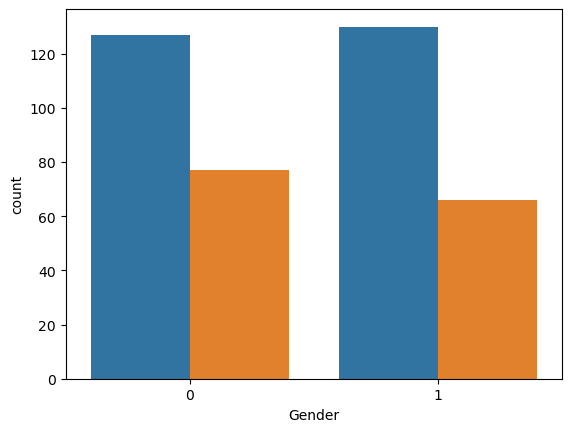

In [122]:
c_graph= sb.countplot(x= 'Gender', hue= 'Purchased', data= cdf)

C:\Users\SUMIT\AppData\Local\Temp\ipykernel_9524\3736438618.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  d_ghrap=sb.distplot(cdf['Age'],bins=20,kde=False)


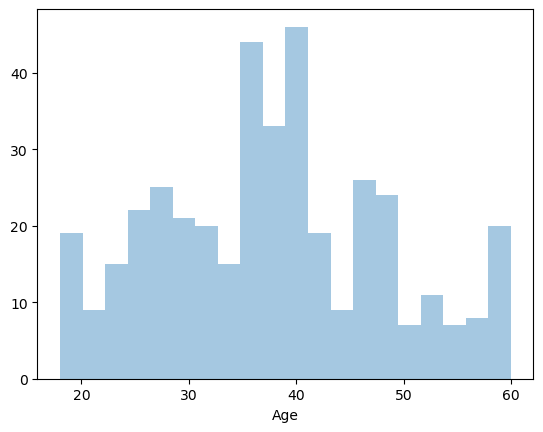

In [123]:
d_ghrap=sb.distplot(cdf['Age'],bins=20,kde=False)

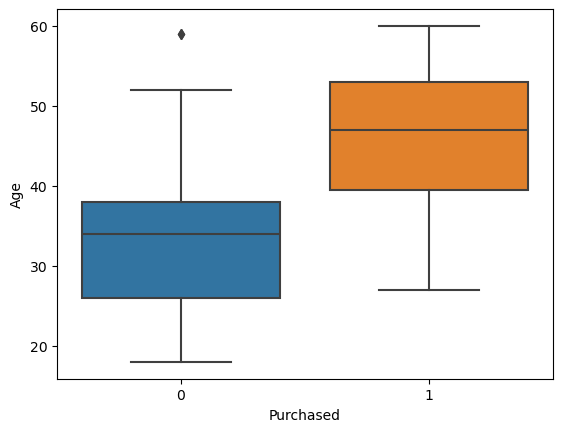

In [124]:
b_graph= sb.boxplot(x= 'Purchased', y= 'Age', data=cdf)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


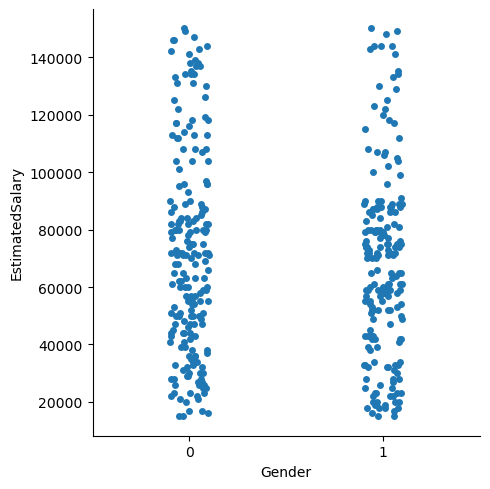

In [125]:
c_graph=sb.catplot(x= 'Gender', y= 'EstimatedSalary', data=cdf)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [143]:
xtrain,xtest,ytrain,ytest=train_test_split(cdf.Age,cdf.Purchased,test_size=0.2)

In [144]:
xtrain,xtest,ytrain,ytest

(93     29
 182    32
 349    38
 27     47
 77     22
        ..
 61     25
 56     23
 147    41
 59     32
 50     24
 Name: Age, Length: 320, dtype: int64,
 237    37
 22     48
 296    42
 169    29
 290    39
        ..
 298    45
 79     26
 82     20
 398    36
 171    34
 Name: Age, Length: 80, dtype: int64,
 93     0
 182    1
 349    0
 27     1
 77     0
       ..
 61     0
 56     0
 147    0
 59     0
 50     0
 Name: Purchased, Length: 320, dtype: int64,
 237    0
 22     1
 296    1
 169    0
 290    1
       ..
 298    0
 79     0
 82     0
 398    0
 171    0
 Name: Purchased, Length: 80, dtype: int64)

In [145]:
lg=LogisticRegression()

In [146]:
model1=lg.fit(np.array(xtrain).reshape(-1,1),ytrain)

In [147]:
model2=lg.score(np.array(xtest).reshape(-1,1),ytest)
model2

0.8875

In [148]:
y_predict=lg.predict(np.array(xtest).reshape(-1,1))

In [149]:
y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [150]:
con_m= confusion_matrix(ytest, y_predict)

In [151]:
con_m

array([[56,  3],
       [ 6, 15]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Data')

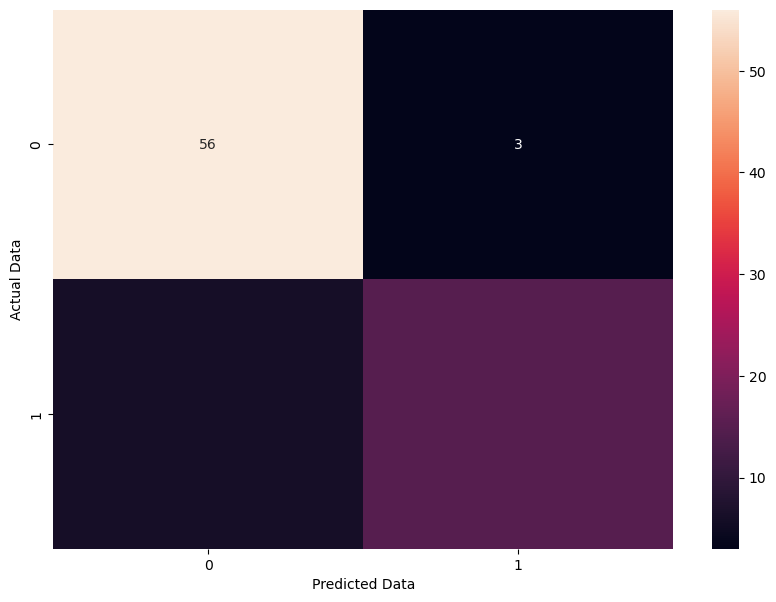

In [153]:
plt.figure(figsize=(10,7))
sb.heatmap(con_m,annot=True)
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')